# Exercise 01.a -- Solving Poisson's Equation

To solve
$$\frac{{\rm d}^2 \phi}{{\rm d}x^2} = f(x)$$
in the region
$$\Omega = \{x: 0  \leq x \leq 10\}$$
with grid points
$$G = \{x: x = \frac{1}{2}(i-1)\}$$
the lecture discretized
$$
\frac{\phi_{i+1} - 3\phi_i + \phi_{i-1}}{\Delta x^2} = f_i
$$
which translates to
$$A\vec{\phi} = \vec{f}$$
with
$$
\vec{f} = (
  f_2 - \phi_1 / \Delta x^2, f_3,
  ..., f_{18},
  f_{19} - \phi_{20} / \Delta x ^2)
$$
and $A$ being of tri-diagonal form with
$-\frac{2}{\Delta x^2}$ on the diagonal and $\frac{1}{\Delta x^2}$ on the off-diagonals:
$$A_{m,n} = 
  - \frac{2}{\Delta x^2}\delta_{m,n}
  + \frac{1}{\Delta x^2} (\delta_{m+1,n} + \delta_{m,n+1})
$$

We'll solve for
$$\vec{\phi} = A^{-1} \vec{f}$$
using a builtin linear algebra solver.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# parameters
I = 21  # Number of grid points in the domain (including boundaries)
L = 10  # Physical length of the domain
phi_left = 1.0  # Boundary condition at x=0
phi_right = -1.0  # Boundary condition at x=L

In [3]:
delta_x = L / (I-1)
x = delta_x * np.arange(I)

print(x)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]


In [4]:
f_orig = np.random.normal(size=(I-2, ))

f_with_bc = f_orig.copy()
f_with_bc[0] -= phi_left / delta_x ** 2
f_with_bc[-1] -= phi_right / delta_x ** 2

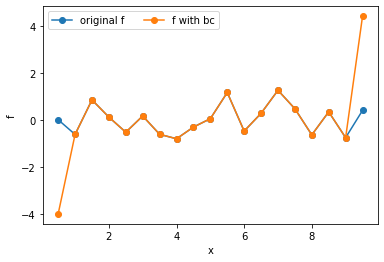

In [5]:
plt.plot(x[1:-1], f_orig, 'o-', label="original f")
plt.plot(x[1:-1], f_with_bc, 'o-', label="f with bc")
plt.gca().set_xlabel("x")
plt.gca().set_ylabel("f")
plt.gca().legend(ncol=2);

In [6]:
# Zero matrix of shape of A
A = np.zeros((I-2, I-2))

# index vector
indices = np.arange(I-2)

# set diagonal
A[indices, indices] = -2 / delta_x ** 2

# set off-diagonal
A[indices[:-1], indices[:-1] + 1] = 1 / delta_x ** 2
A[indices[:-1] + 1, indices[:-1]] = 1 / delta_x ** 2

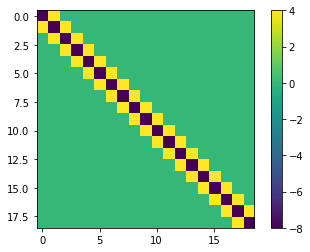

In [7]:
plt.imshow(A)
plt.colorbar();

In [8]:
# empty phi
phi = np.zeros((I, ))

# boundary conditions
phi[0] = phi_left
phi[-1] = phi_right

# solve for phi in domain
phi[1:-1] = np.matmul(np.linalg.inv(A), f_with_bc)

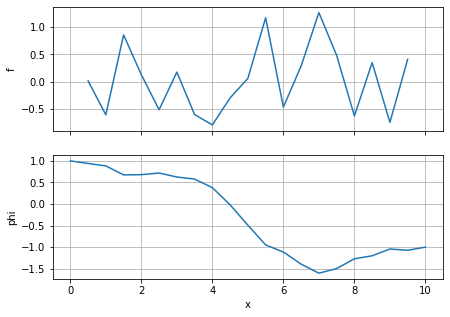

In [9]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(7, 5))

ax[0].plot(x[1:-1], f_orig)
ax[0].set_ylabel("f")
ax[0].grid();

ax[1].plot(x, phi)
ax[1].set_ylabel("phi")
ax[1].set_xlabel("x")
ax[1].grid();

## Test for original equation

$$\frac{\phi_{i+1} - 2\phi_{i} + \phi_{i-1}}{\Delta x^2} = f_i$$

In [10]:
assert np.allclose(
    (phi[2:] - 2 * phi[1:-1] + phi[:-2]) / delta_x ** 2,
    f_orig
)